In [1]:

>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/16-17-fall-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/16-17-fall-ta.xlsx") # TA preference list
students_df = pd.read_excel("/Users/artun/Downloads/2015-2019 UG Courses.xlsx")

In [3]:
course_n_rows,course_n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(course_n_rows, course_n_columns))

Shape of course dataframe is
number of rows: 103, number of columns: 9


In [4]:
is_2016fall = students_df['Semester'] == '2016-1'
fall_2016df = students_df[is_2016fall]
fall_2016df = fall_2016df.reset_index()
fall_2016df.head(65)
student_n_rows,student_n_columns = fall_2016df.shape


In [5]:

n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 315, number of columns: 11


In [6]:
print("315 TA's assigned to FENS courses during fall semester of 2014/2015")

315 TA's assigned to FENS courses during fall semester of 2014/2015


# Brief preview of both TA and Course preference lists¶


In [7]:
Course_df.head(course_n_rows)

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,10367.0,BIO 306,0,Microbiology,NaN,15.0,15.0,1-Yunus Akkoc ( 65757 ) (10 / 10)\n2-Raheela R...,"Yunus Akkoc (65757, BIO, 10 hours)\nBiran Musu..."
2,10369.0,BIO 308,0,Plant Physiology,NaN,15.0,15.0,1-Cevza Esin Tunc ( 65674 ) (10 / 10)\n1-Rahee...,"Cevza Esin Tunc (65674, BIO, 10 hours)\nRaheel..."
3,10373.0,BIO 321,0,Biochemistry I,NaN,25.0,20.0,2-Yunus Akkoc ( 65757 ) (10 / 10)\n3-Melike Ge...,"Sevde Nur Karatas (65640, BIO, 20 hours)\nBahr..."
4,10375.0,BIO 332,0,Cell Biology,NaN,30.0,20.0,2-Nazife Tolay ( 65329 ) (10 / 10)\n2-Melike G...,"Ronay Cetin (65771, BIO, 10 hours)\nLolai Ikro..."
5,10371.0,BIO 407,0,Multicellular Organization,NaN,5.0,5.0,3-Burcin Ustbas ( 65608 ) (10 / 10)\n4-Nazife ...,"Halise Busra Cagirici (65299, BIO, 5 hours)"
6,10377.0,BIO 445,0,Plant Tissue Culture Tech.,NaN,10.0,5.0,1-Melike Cokol Cakmak ( 65683 ) (10 / 10)\n1-O...,"Melike Cokol Cakmak (65683, BIO, 10 hours)"
7,10372.0,BIO 447,0,Plant Breeding,NaN,0.0,5.0,1-Babar Hussain ( 65423 ) (10 / 10),None
8,10380.0,BIO 452,0,Immunology,NaN,10.0,10.0,1-Ronay Cetin ( 65771 ) (20 / 10)\n2-Cevza Esi...,"Ronay Cetin (65771, BIO, 10 hours)"
9,10387.0,CHEM 301,0,Inorganic Chemistry,NaN,25.0,15.0,1-Zahra Goharibajestani ( 65494 ) (20 / 20)\n3...,"Zahra Goharibajestani (65494, MAT, 20 hours)\n..."


In [8]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim \nRamadan,PHD,MATH,20,20,1- MATH 201 (190 / 125)\n2- MATH 301 (20 / 15)...,MATH 201,10945.0,NaN,NaN
1,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- ENS 209 (120 / 100)\n2- ME 307 (30 / 38)\n3...,ME 307,10554.0,\nME 409,11247.0
2,14277,Abdurrahman \nBurak,MS,EE,10,10,1- EE 303 (20 / 20)\n2- EE 480 (0 / 5)\n3- ENS...,EE 303,10419.0,NaN,NaN
3,20205,Adnan \nTaşdemir,PHD,MAT,10,10,NaN,NS 102,10751.0,NaN,NaN
4,21965,Ahmad Reza\nMotezakker,MS,ME,10,10,1- ENS 204 (50 / 75)\n2- MATH 101 (325 / 188)\...,ENS 204,10888.0,NaN,NaN


# Data types for TA & Courses dataframes¶


In [9]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

In [10]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

# Dealing with Dirty Data

In [11]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [12]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim Ramadan,PHD,MATH,20,20,1- MATH 201 (190 / 125)\n2- MATH 301 (20 / 15)...,MATH 201,10945,0,0
1,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- ENS 209 (120 / 100)\n2- ME 307 (30 / 38)\n3...,ME 307,10554,ME 409,11247
2,14277,Abdurrahman Burak,MS,EE,10,10,1- EE 303 (20 / 20)\n2- EE 480 (0 / 5)\n3- ENS...,EE 303,10419,0,0
3,20205,Adnan Taşdemir,PHD,MAT,10,10,0,NS 102,10751,0,0
4,21965,Ahmad Reza Motezakker,MS,ME,10,10,1- ENS 204 (50 / 75)\n2- MATH 101 (325 / 188)\...,ENS 204,10888,0,0


In [13]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,10367,BIO 306,0,Microbiology,0,15,15,1-Yunus Akkoc ( 65757 ) (10 / 10)\n2-Raheela R...,"Yunus Akkoc (65757, BIO, 10 hours)\nBiran Musu..."
2,10369,BIO 308,0,Plant Physiology,0,15,15,1-Cevza Esin Tunc ( 65674 ) (10 / 10)\n1-Rahee...,"Cevza Esin Tunc (65674, BIO, 10 hours)\nRaheel..."
3,10373,BIO 321,0,Biochemistry I,0,25,20,2-Yunus Akkoc ( 65757 ) (10 / 10)\n3-Melike Ge...,"Sevde Nur Karatas (65640, BIO, 20 hours)\nBahr..."
4,10375,BIO 332,0,Cell Biology,0,30,20,2-Nazife Tolay ( 65329 ) (10 / 10)\n2-Melike G...,"Ronay Cetin (65771, BIO, 10 hours)\nLolai Ikro..."
5,10371,BIO 407,0,Multicellular Organization,0,5,5,3-Burcin Ustbas ( 65608 ) (10 / 10)\n4-Nazife ...,"Halise Busra Cagirici (65299, BIO, 5 hours)"


In [14]:
Course_df.head(104)

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,10367,BIO 306,0,Microbiology,0,15,15,1-Yunus Akkoc ( 65757 ) (10 / 10)\n2-Raheela R...,"Yunus Akkoc (65757, BIO, 10 hours)\nBiran Musu..."
2,10369,BIO 308,0,Plant Physiology,0,15,15,1-Cevza Esin Tunc ( 65674 ) (10 / 10)\n1-Rahee...,"Cevza Esin Tunc (65674, BIO, 10 hours)\nRaheel..."
3,10373,BIO 321,0,Biochemistry I,0,25,20,2-Yunus Akkoc ( 65757 ) (10 / 10)\n3-Melike Ge...,"Sevde Nur Karatas (65640, BIO, 20 hours)\nBahr..."
4,10375,BIO 332,0,Cell Biology,0,30,20,2-Nazife Tolay ( 65329 ) (10 / 10)\n2-Melike G...,"Ronay Cetin (65771, BIO, 10 hours)\nLolai Ikro..."
5,10371,BIO 407,0,Multicellular Organization,0,5,5,3-Burcin Ustbas ( 65608 ) (10 / 10)\n4-Nazife ...,"Halise Busra Cagirici (65299, BIO, 5 hours)"
6,10377,BIO 445,0,Plant Tissue Culture Tech.,0,10,5,1-Melike Cokol Cakmak ( 65683 ) (10 / 10)\n1-O...,"Melike Cokol Cakmak (65683, BIO, 10 hours)"
7,10372,BIO 447,0,Plant Breeding,0,0,5,1-Babar Hussain ( 65423 ) (10 / 10),None
8,10380,BIO 452,0,Immunology,0,10,10,1-Ronay Cetin ( 65771 ) (20 / 10)\n2-Cevza Esi...,"Ronay Cetin (65771, BIO, 10 hours)"
9,10387,CHEM 301,0,Inorganic Chemistry,0,25,15,1-Zahra Goharibajestani ( 65494 ) (20 / 20)\n3...,"Zahra Goharibajestani (65494, MAT, 20 hours)\n..."
10,10389,CHEM 405,0,Electrochemistry,0,5,5,1-Esaam Jamil ( 65367 ) (10 / 10)\n1-Mahdieh S...,"Sina Abdolhosseinzadeh (65378, MAT, 5 hours)"


## How many TA's requested for each course ?

In [15]:
for courses in range(1,course_n_rows) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 306 requested 3 TA's
BIO 308 requested 5 TA's
BIO 321 requested 4 TA's
BIO 332 requested 6 TA's
BIO 407 requested 2 TA's
BIO 445 requested 5 TA's
BIO 447 requested 1 TA's
BIO 452 requested 5 TA's
CHEM 301 requested 4 TA's
CHEM 405 requested 11 TA's
CS 201 requested 23 TA's
CS 204 requested 14 TA's
CS 300 requested 14 TA's
CS 302 requested 4 TA's
CS 303 requested 6 TA's
CS 307 requested 8 TA's
CS 400 requested 2 TA's
CS 402 requested 2 TA's
CS 405 requested 3 TA's
CS 408 requested 6 TA's
EE 303 requested 4 TA's
EE 307 requested 2 TA's
EE 311 requested 5 TA's
EE 313 requested 4 TA's
EE 401 requested 2 TA's
EE 403 requested 2 TA's
EE 407 requested 2 TA's
EE 409 requested 2 TA's
EE 413 requested 2 TA's
EE 414 requested 2 TA's
EE 417 requested 1 TA's
EE 473 requested 4 TA's
EE 480 requested 3 TA's
ELAE 1 requested 3 TA's
ENS 202 requested 3 TA's
ENS 203 requested 8 TA's
ENS 204 requested 9 TA's
ENS 205 requested 30 TA's
ENS 208 requested 20 TA's
ENS 209 requested 22 TA's
ENS 211 request

## How many TA's assigned to each course ?

In [16]:
for TA in range(1,course_n_rows) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 306 assigned 2 TA's
BIO 308 assigned 2 TA's
BIO 321 assigned 2 TA's
BIO 332 assigned 3 TA's
BIO 407 assigned 1 TA's
BIO 445 assigned 1 TA's
BIO 447 assigned 0 TA's
BIO 452 assigned 1 TA's
CHEM 301 assigned 2 TA's
CHEM 405 assigned 1 TA's
CS 201 assigned 15 TA's
CS 204 assigned 4 TA's
CS 300 assigned 2 TA's
CS 302 assigned 1 TA's
CS 303 assigned 4 TA's
CS 307 assigned 1 TA's
CS 400 assigned 1 TA's
CS 402 assigned 1 TA's
CS 405 assigned 1 TA's
CS 408 assigned 3 TA's
EE 303 assigned 2 TA's
EE 307 assigned 1 TA's
EE 311 assigned 1 TA's
EE 313 assigned 1 TA's
EE 401 assigned 1 TA's
EE 403 assigned 1 TA's
EE 407 assigned 1 TA's
EE 409 assigned 1 TA's
EE 413 assigned 1 TA's
EE 414 assigned 1 TA's
EE 417 assigned 1 TA's
EE 473 assigned 0 TA's
EE 480 assigned 0 TA's
ELAE 1 assigned 0 TA's
ENS 202 assigned 1 TA's
ENS 203 assigned 4 TA's
ENS 204 assigned 4 TA's
ENS 205 assigned 14 TA's
ENS 208 assigned 6 TA's
ENS 209 assigned 7 TA's
ENS 211 assigned 5 TA's
ENS 491 assigned 6 TA's
GR 555 E ass

## Number of Ta's for each program

<class 'pandas.core.series.Series'>


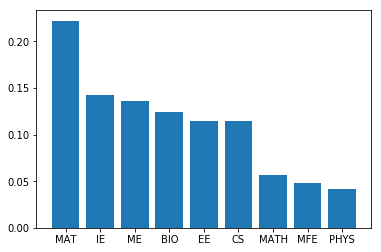

In [17]:
top_programs = TA_df['Program'].value_counts()
print(type(top_programs))
keys = top_programs.keys()
vals = top_programs .values
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Real distribution")
course_array = top_programs.keys()

<BarContainer object of 9 artists>

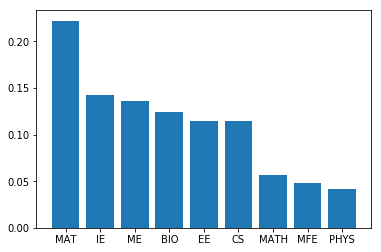

In [18]:
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Real distribution")

In [19]:
class HashNode :
    course : str # course name
    program : str # course program 
    info_list : dict # list of TA's assigned to that course wrt their programs # each node contains program and count
        
    def __init__(self, course, program , infolist):
        self.course = course
        self.program = program
        self.info_list = infolist    

In [20]:
class Node :
    program : str
    info_list : dict
    
    def __init__(self,program,info_list) :
        self.program = program
        self.info_list = info_list

In [21]:
print(course_array)

Index(['MAT', 'IE', 'ME', 'BIO', 'EE', 'CS', 'MATH', 'MFE', 'PHYS'], dtype='object')


In [22]:
def findProgram(course_name,course_array) :
    flag = False
    if "MATH" in course_name :
        # i had to do this since a collision with MAT and MATH can occur beacuse i am looking for the substrings
        # ask for any solutions ?
        flag = True
        return "MATH"  
    else :
        for i in range(len(course_array)) :
            if course_array[i] in course_name :
                flag = True
                return course_array[i]
    if flag == False :
        return 'OTHER' # for common courses
            

In [23]:
def findTAprogram_update_version(ta_array,course_array,return_dict) : # returns a dictionary of programs
    for i in range(len(ta_array)):
        if "MATH" in ta_array[i] :
                try:
                    return_dict['MATH'] = return_dict['MATH'] + 1
                except KeyError as e :
                    return_dict['MATH'] = 1
                continue
        for j in range(len(course_array)) :    
            if course_array[j] in ta_array[i]: # in means search whether a substring occurs in that string
                try :
                    return_dict[course_array[j]] = return_dict[course_array[j]] + 1 # if exists , increment
                except KeyError as e :
                    return_dict[course_array[j]] = 1# if not exists , create
   # print(return_dict)

In [24]:
def findTAprogram(ta_array,course_array) : # returns a dictionary of programs
    return_dict = {} # an empty dictionary
    for i in range(len(ta_array)):
        if "MATH" in ta_array[i] :
                try:
                    return_dict['MATH'] = return_dict['MATH'] + 1
                except KeyError as e :
                    return_dict['MATH'] = 1
                continue
        for j in range(len(course_array)) :    
            if course_array[j] in ta_array[i]: # in means search whether a substring occurs in that string
                try :
                    return_dict[course_array[j]] = return_dict[course_array[j]] + 1 # if exists , increment
                except KeyError as e :
                    return_dict[course_array[j]] = 1# if not exists , create
   # print(return_dict)
    return return_dict 

            

In [25]:
def createNode(series_object) :
    ta_string = series_object[-1] # assigned teaching grads column
    course_name = series_object[1] # refers to course name
    ta_list = ta_string.split('\n') # 
    program = findProgram(course_name,course_array)
    ta_dict = findTAprogram(ta_list,course_array)
   # print(ta_dict)
    X = HashNode(course_name,program,ta_dict)
    return X

In [26]:
course_table = {} # a hashtable implemented with seperate chaining methodology
program_table = {} # a hashtable implemented with seperate chaining methodology

print(course_n_rows)
for i in range(1,course_n_rows) :
    series_object = Course_df.loc[i]
    program = findProgram(series_object[1],course_array) 
    try :
        course_table[program].append(createNode(series_object))
        
    except KeyError as e :
        mylist = []
        mylist.append(createNode(series_object))
        course_table[program] = mylist
        
        

103


IndentationError: unexpected indent (<ipython-input-27-4e69ca0094bc>, line 2)

Graph for course MATH 101


([<matplotlib.axis.XTick at 0x1a1a743278>,
 <a list of 5 Text xticklabel objects>)

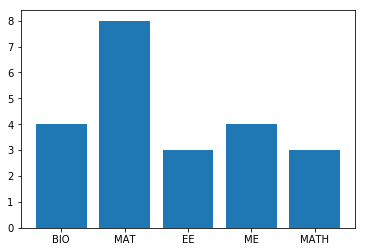

In [28]:
todo1 = course_table['MATH'][0].course
D = course_table['MATH'][0].info_list

print("Graph for course " + todo1)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

In [29]:
def createProgramTable(program_table,program,course_array) :
    return_dict = {}
    for i in range(1,course_n_rows) :
        if findProgram(Course_df.at[i,'Name'],course_array) == program : 
            ta_array = Course_df.at[i,'Assigned Teaching Grads'].split('\n')
            findTAprogram_update_version(ta_array,course_array,return_dict) # update the return dict
    
    #after collecting all the programs
    X = Node(program,return_dict)
    program_table[program] = X
            

In [30]:
for i in range(len(course_array)) :
    program = course_array[i]
    createProgramTable(program_table, program,course_array)
    
    
    
    
            
            
    

In [31]:
print(program_table["MATH"].info_list)

{'BIO': 5, 'MAT': 15, 'EE': 7, 'ME': 11, 'MATH': 18, 'PHYS': 3, 'MFE': 1, 'CS': 2}


In [32]:
def getTa(course_name) :
    for i in range(1,course_n_rows) :
        if Course_df.at[i,'Name'] == course_name :
            return (len(Course_df.at[i,'Assigned Teaching Grads'].splitlines()))

In [33]:
fall_2016df.head()

,index,Semester,Subject,Code,SC,Sect.,Title,SU Credit,Enrl-last,PI
0,197,2016-1,BIO,306,BIO306,0,Microbiology,4,15,Devrim Gözüaçık
1,198,2016-1,BIO,308,BIO308,0,Plant Physiology,3,24,Levent Öztürk
2,199,2016-1,BIO,321,BIO321,0,Biochemistry I,4,32,Meltem Müftüoğlu
3,200,2016-1,BIO,332,BIO332,0,Cell Biology,3,29,Zehra Sayers
4,201,2016-1,BIO,407,BIO407,0,Multicellular Organization,3,14,Bala Anı Akpınar


In [34]:
def getStudent(course_name) :
    to_return = 0
    for i in range(student_n_rows) : 
        if fall_2016df.at[i,'SC'] == course_name :
            to_return = to_return + fall_2016df.at[i,'Enrl-last']
        
    return to_return

In [35]:
def ta_student_ratio(course_name,coursename) :
    student_number = 0
    ta_number = 0 
    student_number = getStudent(coursename)
    ta_number = getTa(course_name)
    return ta_number/student_number
    
    
    

In [36]:
print(ta_student_ratio("IE 302","IE302"))

0.016853932584269662


In [ ]:
#Course_df = Course_df.to_excel("ens491.xlsx")

In [ ]:
#TA_df= TA_df.to_excel("tapow.xlsx")

In [37]:
artun = (Course_df.loc[1]['Assigned Teaching Grads'].splitlines())
print("10 " in artun[0].split(",")[2])

True


In [38]:
def get_course_object(course_name) :
    for i in range(1,course_n_rows) :
        if Course_df.at[i,'Name']  == course_name :
            return Course_df.loc[i] # returns the corresponding row 

In [39]:
def get_ta_hour(assigned_teaching_grads) : 
    return_value = 0
    print(assigned_teaching_grads)
    #assigned_teaching_grads is a string
    assigned_teaching_grads = assigned_teaching_grads.splitlines()
    for i in range(len(assigned_teaching_grads)) :
        if "5" in assigned_teaching_grads[i].split(',')[2] and "15" not in assigned_teaching_grads[i].split(',')[2] :
            return_value = return_value + 5
        elif "10"in assigned_teaching_grads[i].split(',')[2] :
            return_value = return_value + 10 
        elif "15" in assigned_teaching_grads[i].split(',')[2] :
            return_value = return_value + 15 
        elif "20" in assigned_teaching_grads[i].split(',')[2] :
            return_value = return_value + 20 
        
            
    return return_value
    

In [40]:
def get_student_sum(dataframe,course_name) :
    sum_value = 0
    course_name = course_name.replace(" ","")
    for i in range(student_n_rows) :
        if dataframe.at[i,"SC"] == course_name :
            sum_value = sum_value + int(dataframe.at[i,"Enrl-last"])
            
    return sum_value
            

In [41]:
def student_ta_hour_ratio(course_name) :
    series_object = get_course_object(course_name)
    sum_ta_hours = get_ta_hour(series_object['Assigned Teaching Grads'])
    print(sum_ta_hours)
    sum_students = get_student_sum(fall_2016df,course_name)
    print(sum_students)
    return sum_ta_hours/sum_students

    
    

## Number of Students / TA_hours 

In [42]:
print("Ratio is: ",student_ta_hour_ratio("CS 201"))

Gizem Gezici (65246, CS, 10 hours)
Yasin Findik (65636, CS, 10 hours)
Yusuf Izmirlioglu (65382, CS, 10 hours)
Ece Egemen (65396, CS, 20 hours)
Artrim Kjamilji (65374, CS, 10 hours)
Muge Segmen (65259, CS, 10 hours)
Omid Khorsand Kazemy (65769, CS, 20 hours)
Baran Usta (65595, CS, 20 hours)
Beste Seymen (65421, CS, 10 hours)
Hemed Hamisi Kaporo (65785, CS, 20 hours)
Mahsa Mozaffari (65720, CS, 20 hours)
Sara Atito Ali Ahmed (65531, CS, 20 hours)
Saeed Nourizadeh (65682, CS, 10 hours)
Ataman Girisken (65245, CS, 10 hours)
Ibrahim Faruk Yalciner (65699, CS, 10 hours)
210
390
Ratio is:  0.5384615384615384


In [44]:
print(course_table['MATH'][0].course)

MATH 101


In [175]:
print(course_array)

Index(['MAT', 'IE', 'ME', 'BIO', 'EE', 'CS', 'MATH', 'MFE', 'PHYS'], dtype='object')


In [191]:
def get_course_number(course) :
    counter = 0
    for i in range(1,course_n_rows) :
        if course not in course_array:
            counter+=1
        
        elif course == 'MAT' :
            if course in Course_df['Name'][i] and 'MATH' not in Course_df['Name'][i] : # remove the ambiguity in mat and math
                counter+=1
        else :
            #print("counter is: ",counter)
            if course in Course_df['Name'][i] :
                counter+=1
                
  #  print(counter)
    return counter
        
        

In [47]:
print(get_course_number('MATH'))

8


In [48]:
print(Course_df['Name'][62])

MAT 305


In [63]:
print(course_table['MATH'][0].course)

MATH 101


In [50]:
print(course_table['IE'][0].info_list)

{'IE': 4}


In [ ]:

'''= numpy.array([1, 2, 3])

newArray = numpy.append (a, [10, 11, 12])'''



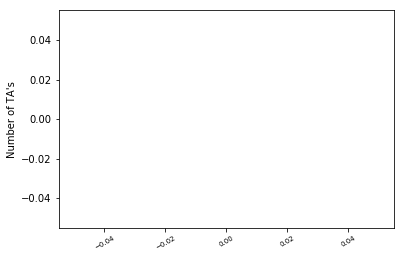

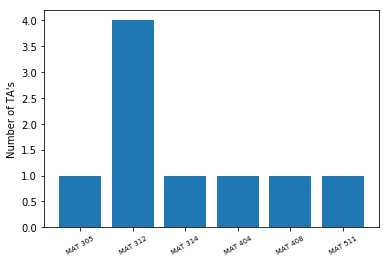

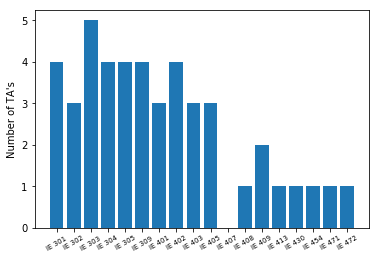

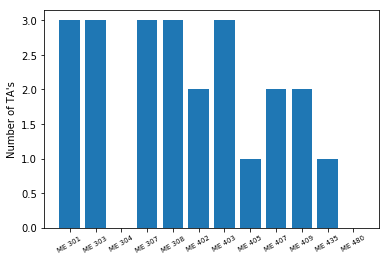

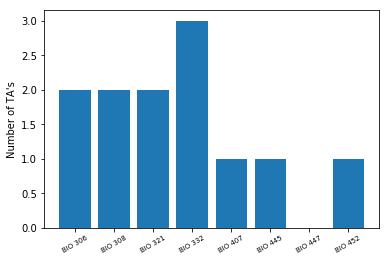

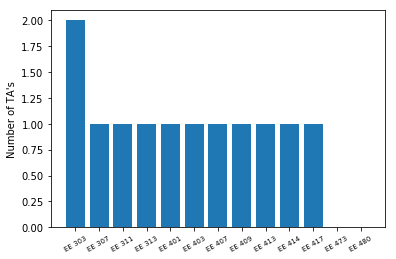

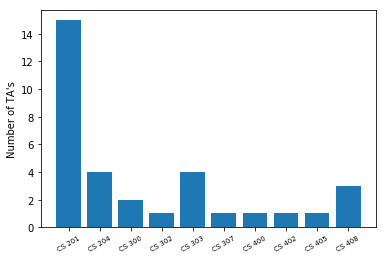

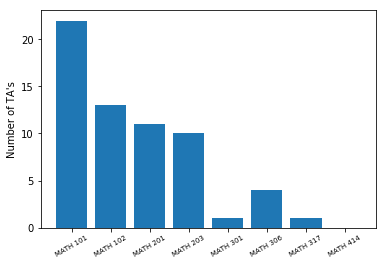

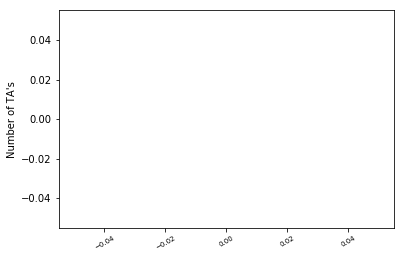

In [61]:

## for each 
value_array = []
key_array = []
for i in range(len(course_array)) :
    temp_course = course_array[i]
    plt.bar(key_array,value_array)
    plt.ylabel("Number of TA's")
    plt.xticks(fontsize=7, rotation=30)
    plt.show()
    number_of_courses = get_course_number(temp_course) 
    value_array = []
    key_array = []
    for j in range(number_of_courses) : # within each course
        key_array.append(course_table[course_array[i]][j].course)
        value_array.append(sum(course_table[course_array[i]][j].info_list.values()))
        

In [189]:
def find_index(course_name,course_area,other_courses) :
  #  print("inside find index")
    if course_area == 'OTHER' :
       # print('OTHER find_index')
        for course in range(get_course_number(other_courses)) :
          #  print("inside after counter")
          #  print(course_table[course_area][course].course)
            if course_table[course_area][course].course == course_name : ##if we find our course
                return course
            
    else:
        for course in range(get_course_number(course_area)) :
          #  print("inside for loop find index")
            if course_table[course_area][course].course == course_name : ##if we find our course
                return course
            

In [206]:
def visual_distribution(course_name,course_area,other_course_type) :
    index = find_index(course_name,course_area,other_course_type)
    keys = course_table[course_area][index].info_list.keys() ### ta program
    values = course_table[course_area][index].info_list.values()
   
    
    plt.pie(values,labels = keys,shadow = True,autopct='%1.1f%%',startangle=140)
    print(course_table[course_area][index].course)
    print(course_table[course_area][index].info_list)
    
    

MATH 306
{'EE': 2, 'ME': 1, 'PHYS': 1}


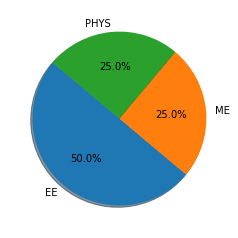

In [207]:
visual_distribution('MATH 306','MATH','MATH')

MATH 101
{'BIO': 4, 'MAT': 8, 'EE': 3, 'ME': 4, 'MATH': 3}


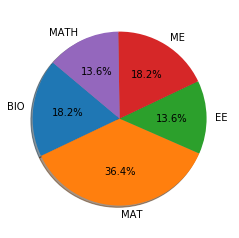

In [193]:
visual_distribution('MATH 101','MATH','MATH')

MATH 102
{'BIO': 1, 'MAT': 5, 'ME': 2, 'PHYS': 1, 'MFE': 1, 'CS': 2, 'EE': 1}


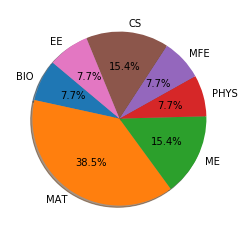

In [194]:
visual_distribution('MATH 102','MATH','MATH')

MATH 201
{'MAT': 2, 'MATH': 7, 'ME': 1, 'PHYS': 1}


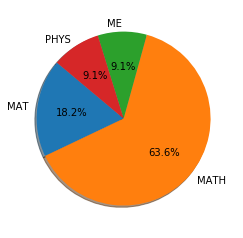

In [195]:
visual_distribution('MATH 201','MATH','MATH')

MATH 203
{'EE': 1, 'ME': 3, 'MATH': 6}


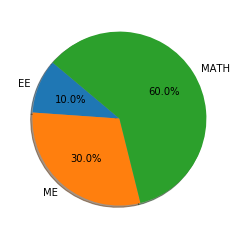

In [196]:
visual_distribution('MATH 203','MATH','MATH')

ENS 205
{'MAT': 14}


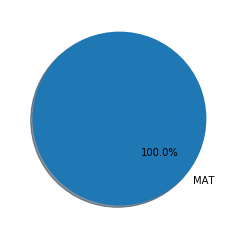

In [197]:
visual_distribution('ENS 205','OTHER','ENS')

ENS 209
{'MFE': 6, 'ME': 1}


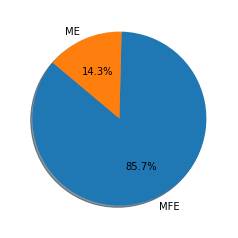

In [198]:
visual_distribution('ENS 209','OTHER','ENS')

CS 201
{'CS': 15}


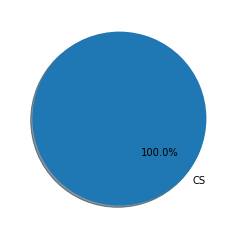

In [199]:
visual_distribution('CS 201','CS','CS')

NS 101
{'BIO': 14, 'MAT': 2, 'PHYS': 2, 'ME': 1}


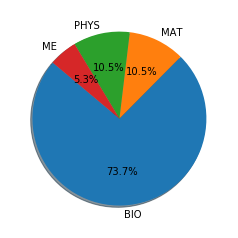

In [200]:
visual_distribution('NS 101','OTHER','NS')

NS 102
{'MAT': 8, 'PHYS': 5, 'EE': 2}


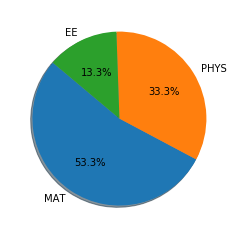

In [201]:
visual_distribution('NS 102','OTHER','NS')

IE 309
{'IE': 2, 'MFE': 2}


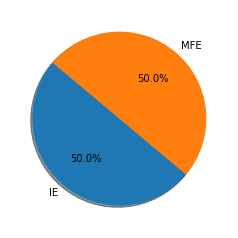

In [202]:
visual_distribution('IE 309','IE','IE')